In [1]:
!wget https://cdn-08.anonfile.com/d8J304Wanf/4d287e00-1581062848/model__.zip

--2020-02-07 08:03:03--  https://cdn-08.anonfile.com/d8J304Wanf/4d287e00-1581062848/model__.zip
Resolving cdn-08.anonfile.com (cdn-08.anonfile.com)... 185.157.161.158
Connecting to cdn-08.anonfile.com (cdn-08.anonfile.com)|185.157.161.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251560197 (240M) [application/zip]
Saving to: ‘model__.zip’

model__.zip         100%[===================>] 239.91M   897KB/s    in 5m 27s  

2020-02-07 08:08:31 (750 KB/s) - ‘model__.zip’ saved [251560197/251560197]



In [2]:
!unzip model__.zip

Archive:  model__.zip
   creating: model__/
   creating: model__/model_/
  inflating: model__/model_/.coveragerc  
  inflating: model__/model_/.gitignore  
  inflating: model__/model_/.travis.yml  
   creating: model__/model_/cfg/
  inflating: model__/model_/cfg/our_model.cfg  
   creating: model__/model_/ckpt/
  inflating: model__/model_/ckpt/our_model-1.data-00000-of-00001  
  inflating: model__/model_/ckpt/our_model-1.index  
  inflating: model__/model_/ckpt/our_model-1.meta  
  inflating: model__/model_/ckpt/our_model-1.profile  
   creating: model__/model_/darkflow/
  inflating: model__/model_/darkflow/cli.py  
   creating: model__/model_/darkflow/cython_utils/
  inflating: model__/model_/darkflow/cython_utils/cy_yolo2_findboxes.pyx  
  inflating: model__/model_/darkflow/cython_utils/cy_yolo_findboxes.pyx  
  inflating: model__/model_/darkflow/cython_utils/nms.pxd  
  inflating: model__/model_/darkflow/cython_utils/nms.pyx  
 extracting: model__/model_/darkflow/cython_utils/__init

In [6]:
%cd model__/model_/


/content/model__/model_


In [7]:
!python3 setup.py build_ext --inplace

Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/model__/model_/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/model__/model_/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/n

In [0]:
%matplotlib inline

You can enter image file path and threshold value.
The result will be stored as output.jpg at the current location.


In [9]:
!python test_our_model.py --image sample_image.jpg --threshold 0.08

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.









Parsing cfg/our_model.cfg
Loading None ...
Finished in 5.7220458984375e-05s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  le

Out is stored as output .jpg

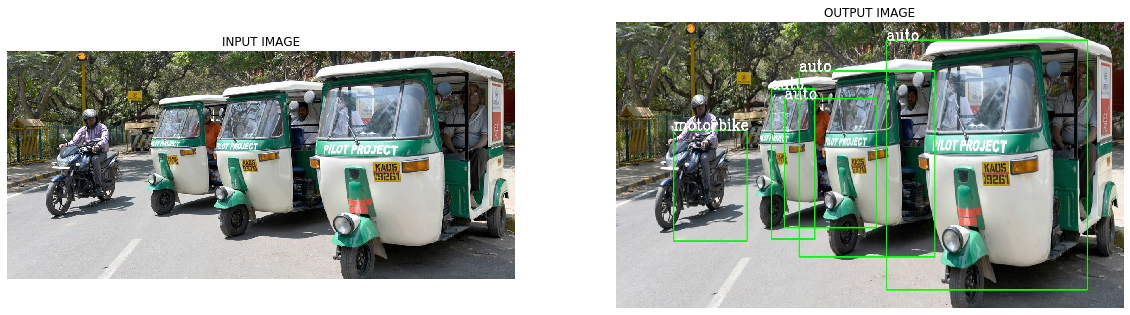

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

input_image = cv2.imread("sample_image.jpg")
input_image=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

output_image = cv2.imread("output.jpg")
#output_image=cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(input_image)
plt.axis('off')
plt.title("INPUT IMAGE")

plt.subplot(1,2,2)
plt.imshow(output_image)
plt.axis('off')
plt.title('OUTPUT IMAGE')
plt.show()